In [ ]:
#@markdown Configuración Inicial
from IPython.utils import io

from google.colab.data_table import DataTable
from IPython.display import display, display_svg
from IPython.display import Javascript
from IPython.display import Markdown, Latex
from IPython.display import Audio, Image
from IPython.display import IFrame, HTML
with io.capture_output() as capt:
  # https://matplotlib-axes-aligner.readthedocs.io/en/latest/
  !pip install mpl-axes-aligner
  !pip install gradio

import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
# https://matplotlib-axes-aligner.readthedocs.io/en/latest/
from mpl_axes_aligner import align

import random
from scipy import constants as const
from scipy import stats as st
from sympy import Point, Polygon

# Avoids scroll-in-the-scroll in the entire Notebook
# https://stackoverflow.com/a/66891328
def resize_colab_cell():
  display(Javascript(
      'google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'
      ))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

def dLatex(self):
  return display(Latex(self))

def dMarkdown(self):
  return display(Markdown(self))

<IPython.core.display.Javascript object>

G: (6.6743e-11, 'm^3 kg^-1 s^-2', 1.5e-15)

,x,z,R,rho
0,23,-20,8,1000
1,23,-45,12,600


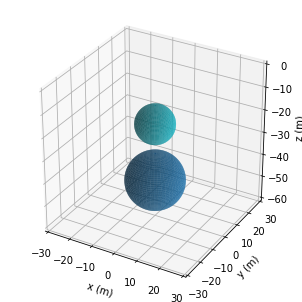

In [ ]:
G_dict = const.physical_constants['Newtonian constant of gravitation']
dMarkdown(f'G: {G_dict}')

def sphereGrav(x, z, R, rho):
  A = 4*np.pi*const.G*rho*R**3
  xz = (x/z)**2+1
  B = 3*z**2*xz**(3/2)
  g = A/B
  if np.isscalar(x):
    return g
  else:
    return np.c_[x, g]


xx = np.r_[-100:100:501j]
xe = 23

p_0 = {
'z':   -20,  #(m)
'R':   8,    #(m)
'rho': 1000  #(kg/m^3)
}

p_1 = {
'z':   -45, #(m)
'R':   12,  #(m)
'rho': 600  #(kg/m^3)
}

columns = ['x','z','R','rho','g']
df = pd.DataFrame([p_0,p_1], columns=columns[:-1])
df['x'] = xe
display(df)


phi, theta = np.mgrid[0:1*np.pi:100j,
                      0:2*np.pi:100j]

sp = lambda R: R*np.array([np.sin(phi)*np.cos(theta),
                           np.sin(phi)*np.sin(theta),
                           np.cos(phi)
                           ])

xyz = lambda x, z, R: [sum(_) for _ in zip(sp(R), (x, 0, z))]

fig = plt.figure(figsize=plt.figaspect(1))
ax = Axes3D(fig)
ax.plot_surface(*xyz(x=0, z=p_0['z'], R=p_0['R']),
                color='tab:cyan', lw=0, alpha=2/3)
ax.plot_surface(*xyz(x=0, z=p_1['z'], R=p_1['R']),
                color='tab:blue', lw=0, alpha=2/3)
ax.set_xlim(-30, +30)
ax.set_ylim(-30, +30)
ax.set_zlim(-60, 0)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')

plt.show()

<IPython.core.display.Javascript object>

,x,z,R,rho,g
0,23,-20,8,1000,1.011046e-07


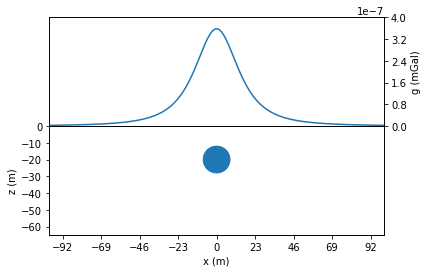

In [ ]:
p_0b = p_0.copy()
p_0b['x'] = xe
S_0 = sphereGrav(**p_0b)
p_0b['g'] = S_0

table_0 = pd.DataFrame(p_0b,
                       columns=columns,
                       index=[0])
display(table_0)


fig, ax_z = plt.subplots()
ax_g = ax_z.twinx()
ax_z.axhline(c='k', lw=1, zorder=0)
ax_g.axvline(100, c='k', lw=1)

p = ax_g.plot(*sphereGrav(xx, **p_0).T)
c = p[-1].get_color()
circle_0 = plt.Circle((0, p_0['z']), p_0['R'],
                      fill=True, color=c)
ax_z.add_artist(circle_0)

ax_z.set_aspect(1)
ax_g.set_yticks(np.r_[0:4e-7:6j])
ax_z.set_yticks(np.r_[-60:0:7j])
ax_z.set_xlim(-100,100)
ax_z.set_xticks(np.r_[-92:92:9j])
align.yaxes(ax_g, 0, ax_z, 0, 1/2)

ax_z.set_xlabel('x (m)')
ax_z.set_ylabel('z (m)',    y=1/4)
ax_g.set_ylabel('g (mGal)', y=3/4)

plt.show()

<IPython.core.display.Javascript object>

,x,z,R,rho,g
1,23,-45,12,600,1.010580e-07


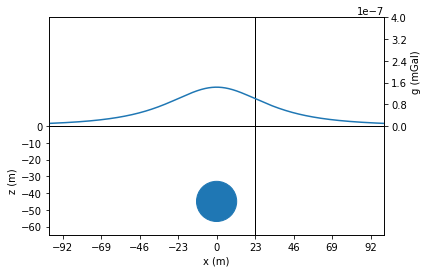

In [ ]:
p_1b = p_1.copy()
p_1b['x'] = xe
S_1 = sphereGrav(**p_1b)
p_1b['g'] = S_1

table_1 = pd.DataFrame(p_1b,
                       columns=columns,
                       index=[1])
display(table_1)


fig, ax_z = plt.subplots()
ax_g = ax_z.twinx()
ax_z.axhline(c='k', lw=1, zorder=0)
ax_g.axvline(xe, c='k', lw=1)

p = ax_g.plot(*sphereGrav(xx, **p_1).T)
c = p[-1].get_color()
circle_1 = plt.Circle((0, p_1['z']), p_1['R'],
                      fill=True, color=c)
ax_z.add_artist(circle_1)

ax_z.set_aspect(1)
ax_g.set_yticks(np.r_[0:4e-7:6j])
ax_z.set_yticks(np.r_[-60:0:7j])
ax_z.set_xlim(-100,100)
ax_z.set_xticks(np.r_[-92:92:9j])
align.yaxes(ax_g, 0, ax_z, 0, 1/2)

ax_z.set_xlabel('x (m)')
ax_z.set_ylabel('z (m)',    y=1/4)
ax_g.set_ylabel('g (mGal)', y=3/4)

plt.show()

<IPython.core.display.Javascript object>

,x,z,R,rho,g
0,23,-20,8,1000,1.011046e-07
1,23,-45,12,600,1.010580e-07


err=0.00046103

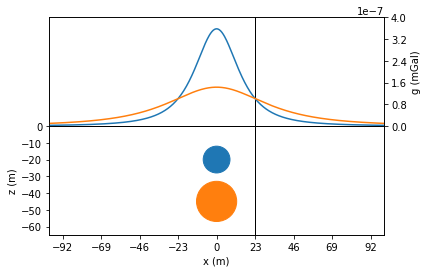

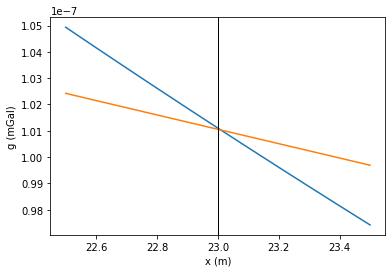

In [ ]:
table = pd.concat([table_0, table_1])
display(table)

err = abs(S_1-S_0)/(S_1+S_0)*2
dMarkdown(f'err={err:.6g}')

fig, ax_z = plt.subplots()
ax_g = ax_z.twinx()


ax_z.axhline(c='k', lw=1, zorder=0)
ax_g.axvline(xe, c='k', lw=1)

for p_i in (p_0, p_1):
  p = ax_g.plot(*sphereGrav(xx, **p_i).T)
  c = p[-1].get_color()
  circle_i = plt.Circle((0, p_i['z']), p_i['R'],
                        fill=True, color=c)
  ax_z.add_artist(circle_i)

ax_z.set_aspect(1)
ax_g.set_yticks(np.r_[0:4e-7:6j])
ax_z.set_yticks(np.r_[-60:0:7j])
ax_z.set_xlim(-100,100)
ax_z.set_xticks(np.r_[-92:92:9j])
align.yaxes(ax_g, 0, ax_z, 0, 1/2)

ax_z.set_xlabel('x (m)')
ax_z.set_ylabel('z (m)',    y=1/4)
ax_g.set_ylabel('g (mGal)', y=3/4)

plt.show()


xxb = np.r_[22.5:23.5:11j]
fig, ax = plt.subplots()
ax.plot(*sphereGrav(xxb, **p_0).T)
ax.plot(*sphereGrav(xxb, **p_1).T)
ax.axvline(xe, c='k', lw=1)

ax.set_xlabel('x (m)')
ax.set_ylabel('g (mGal)')

plt.show()

<IPython.core.display.Javascript object>

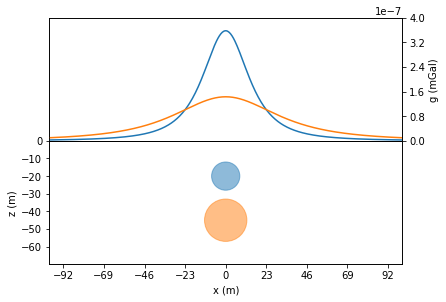

In [ ]:
def fun_sphere(p_a, p_b):
  fig, ax_z = plt.subplots()
  ax_g = ax_z.twinx()
  ax_z.axhline(c='k', lw=1, zorder=0)

  for p_i in (p_a, p_b):
    p = ax_g.plot(*sphereGrav(xx, **p_i).T)
    c = p[-1].get_color()
    circle_i = plt.Circle((0, p_i['z']), p_i['R'],
                          fill=True, color=c, alpha=1/2)
    ax_z.add_artist(circle_i)

  ax_z.set_aspect(1)
  ax_g.set_yticks(np.r_[0:4e-7:6j])
  ax_z.set_yticks(np.r_[-60:0:7j])
  ax_z.set_xlim(-100,100)
  ax_z.set_xticks(np.r_[-92:92:9j])
  align.yaxes(ax_g, 0, ax_z, 0, 1/2)

  ax_z.set_xlabel('x (m)')
  ax_z.set_ylabel('z (m)',    y=1/4)
  ax_g.set_ylabel('g (mGal)', y=3/4)

  fig.tight_layout(pad=0)
  plt.close()
  return fig

fun_sphere(p_0, p_1)

<IPython.core.display.Javascript object>

{'z': -45, 'R': 12, 'rho': 600}


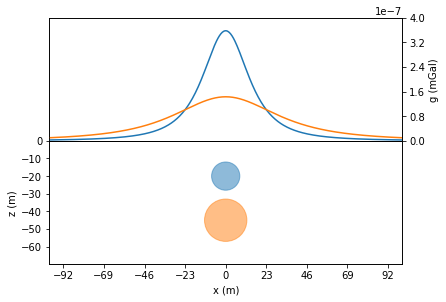

In [ ]:
my_fun = lambda z, R, rho: fun_sphere(
    p_0.copy(),
    {'z': z, 'R': R, 'rho': rho})

print(p_1)
my_fun(**p_1)

In [ ]:
iface = gr.Interface(
    fn=my_fun, 
    inputs=[gr.inputs.Slider(-60, -10 , .1, default=p_0['z']),
            gr.inputs.Slider(5, 15 , .1, default=p_0['R']),
            gr.inputs.Slider(0, 2500 , 10, default=p_0['rho'])],
    outputs='plot',
    live=True,
    allow_flagging=False,
    allow_screenshot=False,
    # title='Gravedad Teorica',
    # description='Valores Teoricos de Gravedad',
    # article = """<p style='text-align: center'>
    # <a href='https://en.wikipedia.org/wiki/Theoretical_gravity'>
    # Wikipedia | Theoretical Gravity</a></p>""",
    examples=[list(p_i.values()) for p_i in (p_1, p_0)],
    theme='huggingface', # "default", "compact" or "huggingface"
    layout='unaligned' # 'horizontal', 'unaligned', 'vertical'
    )

with io.capture_output() as captured:
    iface.launch(inline=True)
print(iface.share_url)
IFrame(src=iface.share_url, width=1200, height=1000)

<IPython.core.display.Javascript object>

https://47231.gradio.app


<IPython.core.display.Javascript object>

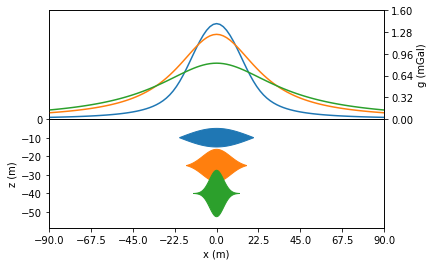

In [ ]:
def Talwani(Model, XZ, rho=600):
  k = len(Model)
  lenXZ = len(XZ)
  xietalist = [Model-XZ[i] for i in range(lenXZ)]
  lenxieta = len(xietalist)
  grav = np.empty(lenxieta)
  for j in range(lenxieta):
    xi  = xietalist[j].T[0]
    eta = xietalist[j].T[1]
    sum = 0
    for i in range(k):
      A = (xi[i-1]*eta[i] - xi[i]*eta[i-1])/\
          ((xi[i]-xi[i-1])**2 + (eta[i]-eta[i-1])**2)
      B1 = 0.5*(eta[i] - eta[i-1])*\
           np.log((xi[i]**2 + eta[i]**2)/\
          (xi[i-1]**2 + eta[i-1]**2))
      B2 = (xi[i] - xi[i-1])*\
           (np.arctan(xi[i]/eta[i])-\
           np.arctan(xi[i-1]/eta[i-1]))
      sum += A*(B1+B2)
    grav[j] = sum
  grav = 1e6*2*const.G*rho*grav
  return np.c_[XZ[:,0], grav]

def draw_eye(s, q=(1,1), d=(0,0), N=50):
  m = N//2
  n = (N-m)
  q = np.array(q)/2
  gauss = st.norm(0, 1/s) 
  f = lambda x: (gauss.pdf(x)-gauss.pdf(1))/\
                (gauss.pdf(0)-gauss.pdf(1))
  ii = np.r_[-1:+1:(n+1)*1j]
  jj = np.r_[+1:-1:(m+1)*1j]
  top    = np.c_[ii, +f(ii)][:-1]
  bottom = np.c_[jj, -f(jj)][:-1]
  eye = q*np.r_[top, bottom] + d
  return eye

XZ = np.c_[-90:90:101j, 0:0:101j]
cosas = np.c_[1:5.7:5j,
              40:10:5j,
              10:40:5j,
              -10:-70:5j,
              600:1500:5j
              ]

fig, ax_z = plt.subplots()
ax_g = ax_z.twinx()
ax_z.axhline(c='k', lw=1, zorder=0)

for w, qx, qz, dz, rho in cosas[:3]:
  eye = draw_eye(w, (qx, qz), (0, dz), 100)
  grav = Talwani(eye, XZ, rho)
  p = ax_g.plot(*grav.T)
  c = p[-1].get_color()
  eye_poly = patches.Polygon(
      eye,
      Fill = True,
      color=c)
  ax_z.add_patch(eye_poly)

ax_z.set_aspect(1)
ax_g.set_yticks(np.r_[0:1.6:6j])
ax_z.set_yticks(np.r_[-60:0:7j])
ax_z.set_xlim(-90,90)
ax_z.set_ylim(-100,0)
ax_z.set_xticks(np.r_[-90:90:9j])
align.yaxes(ax_g, 0, ax_z, 0, 1/2)

ax_z.set_xlabel('x (m)')
ax_z.set_ylabel('z (m)',    y=1/4)
ax_g.set_ylabel('g (mGal)', y=3/4)

plt.show()